# Titanic survived Project

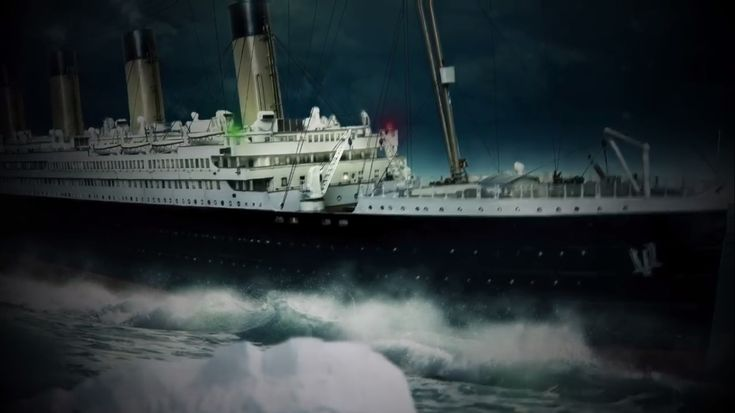

By Mónica Atiaga

Batch - DSNB1222

## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


####  Objective:
1. Understand the Dataset & cleanup (if is required).
2. Build a strong model to predict whether an arbitrary passeger on Titanic would survive the sinking or not.
3. Fine-tune the hyperparameters and compare the evaluation metrics of various algorithms.

### Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Retriving the data

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. Exploratory Data Analysis (EDA)


In [3]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (891, 12)

The column headers in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


This dataset contains 891 rows and 12 columns. Out of which 1 is the target variable "Survived" and the remaining 11 are independent variables described below.
* PassengerId: Passenger ID,
* Survived: Weather Survived or not: 0 = No, 1 = Yes,
* Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd,
* Name: Name of the Passenger,
* Sex: Gender,
* Age: Age in years,
* SibSp: No. of siblings / spouses aboard the Titanic,
* Parch: No. of parents / children aboard the Titanic,
* Ticket: Ticket number,
* Fare: Amount paid for the ticket,
* Cabin: Cabin of residence,
* Embarked: Point of embarkment.

In [4]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are three different types of data (int64, float, and object) present in the dataset.
- PassengerId, Survived, Pclass, SibSP, Parch: int64
- Age, Fare: float64
- Name, Sex, Ticket, Cabin, Embarket: object->String

### 1.1 Missing values

In [5]:
# checking the null values
missing_val = df.isnull().sum().to_frame()

# Calculate the % of the null values
missing_val['% of missing'] = round(df.isnull().sum()/df.shape[0]*100, 2)

missing_val

,0,% of missing
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


The features Age, Cabin and Embarked have null values. Here we can see clearly the percentage of missing values in each feature. 
- Age column has a 20% of null values, so we will impute using the median
- Cabin colum has a 77% of missing values. We are going to look deeper in order to determine if this feature has an impact on the target. Dropping this feature from the dataset could be a way to handle these missing values.
- Embarked column: Being only 2/891 records, we are going to do a further analysis of these two or drop them.

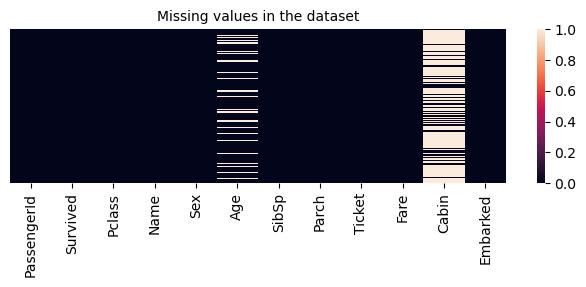

In [6]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title('Missing values in the dataset', fontsize=10);

Here in the plot, we can appreciate that the feature "Cabin" has a lot of missing values, and then the "Age" feature follows.

#### 1.1.1 Embarked column

In [7]:
# Reviewing the missing values in Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both passengers are female, first class, and have the same ticket number 113572. Therefore, the most probably is both have embarked at the same port. Searching for these passengers I found out the had embarked from S(Southampton).

_" She boarded the Titanic at Southampton as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572)."_
Ref. https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html 



In [8]:
# Setting S as Embarket for the NaN values
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

df[df['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


#### 1.1.2 Age column

In [9]:
# Finding how many null values are in each Pclass and Sex group
df.loc[df['Age'].isnull(),:].groupby(['Pclass','Sex']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female            9         9     9    0      9      9       9     9   
       male             21        21    21    0     21     21      21    21   
2      female            2         2     2    0      2      2       2     2   
       male              9         9     9    0      9      9       9     9   
3      female           42        42    42    0     42     42      42    42   
       male             94        94    94    0     94     94      94    94   

               Cabin  Embarked  
Pclass Sex                      
1      female      5         9  
       male       11        21  
2      female      1         2  
       male        0         9  
3      female      1        42  
       male        1        94

As we can see, the missing values are not balanced according to the Pclass groups or gender. Below we analyze the correlation between Age and the other features.

In [10]:
# Calculate the correlation between features
corr_df = df.corr().abs().unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[corr_df['Feature A'] == 'Age']

,Feature A,Feature B,Corr coef
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


Since Pclass feature is highly correlated with Age (0.369226) would be a better option to use the median age of the Pclass group.

In [11]:
age_by_grp = df.set_index(['Pclass', 'Sex'])
age_by_grp = age_by_grp['Age'].groupby(level=[0,1])

print("Median of Age by Pclass and Gender:")
age_by_grp.median().to_frame() 


Median of Age by Pclass and Gender:


Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

 In order to fill null values we will use as follows: 
 * 35.0 for Pclass = 1 and females
 * 40.0 for Pclass = 1 and males
 * 28.0 for Pclass = 2 and females
 * 30.0 for Pclass = 2 and males
 * 21.5 for Pclass = 3 and females
 * 25.0 for Pclass = 3 and males

In [12]:
# Counting the number of null values in the Age column 
print(f"Missing values in Age: {df['Age'].isnull().sum()}")

# Impute the missing values using the median for each group of Pclass and Gender
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))


print(f"Missing values in Age: {df['Age'].isnull().sum()}")


Missing values in Age: 177
Missing values in Age: 0


#### 1.1.3 Cabin column

In [13]:
df['Cabin'].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

While it is true that the "Cabin" feature could influence whether a passenger survived or not, with (687/891) 77% missing values the best option is not to consider this column in the analysis, therefore we are going to drop it.

### 1.2 Features Analysis

Now, we are going to review the unique values of each column in the dataset in order to understand the data and the features.

In [14]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame()
info_df['type'] = df.dtypes.values
info_df

,0,type
PassengerId,891,int64
Survived,2,int64
Pclass,3,int64
Name,891,object
Sex,2,object
Age,89,float64
SibSp,7,int64
Parch,7,int64
Ticket,681,object
Fare,248,float64


About the number of unique values:
1. PassengerId column has the same unique values as the dataset rows, this column only serves to identify the passenger but doesn't influence the target variable. There for we can drop it.
2. Survived column, that is the target, has 2 unique values. Two values from 891 records represent a significant difference, so we can treat this problem as a classification problem.
3. Pclass column (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3), that we can infer:
        1 = Upper Class
        2 = Middle Class
        3 = Lower Class

4. Name column as PassengerId has the same unique values as the dataset rows. Later we will examine if there is valuable info to the prediction model.
5. Sex column is a category variable with two unique values
6. Age column is represented by a float and has 88 unique values.
7. SibSp and Parch are represented by an integer and have 7 unique values each one.
8. Ticket is represented by an object(string) with 681 posible values. It is an identifier, perhaps it could give us information about which passengers are traveling together sharing the same ticket. However, the SibSp and Parch features provide us with information about whether the passengers were traveling alone or in a group.
9. Fare is correctly represented by a float because is a numerical continuous variable.
10. Cabin has 147 unique values.
11. Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S) (Ref. www.kaggle.com):
        C = Cherbourg
        Q = Queenstown
        S = Southampton
    
    
    
Next, we will remove the columns: PassengerId, Name, Ticket for the reasons explained previously. The Cabin column will be dropped due to its high percentage of missing values. 

In [15]:
# First we check the columns
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Dropping the column PassengerId and place the target at the end
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
df.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
286,3,male,30.0,0,0,9.5000,S,1
257,1,female,30.0,0,0,86.5000,S,1
124,1,male,54.0,0,1,77.2875,S,0
553,3,male,22.0,0,0,7.2250,C,1
852,3,female,9.0,1,1,15.2458,C,0
335,3,male,25.0,0,0,7.8958,S,0
650,3,male,25.0,0,0,7.8958,S,0
542,3,female,11.0,4,2,31.2750,S,0
366,1,female,60.0,1,0,75.2500,C,1
445,1,male,4.0,0,2,81.8583,S,1


In [18]:
# Checking the new shape of the dataset.
df.shape

(891, 8)

After dropping some columns the data have 7 features and 1 target variable. 

#### 1.2.1 Verify Missing Values
We are going to verify that the dataset does not present missing values

In [19]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

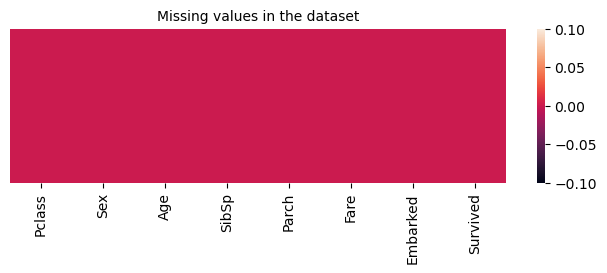

In [20]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title('Missing values in the dataset', fontsize=10);

#### 1.2.2 Summary statistics of the numerical and non-numerical variables

In [21]:
# Summary statistics of numerical columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.112424,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.304424,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Observations: 
- The only features which can be considered as numerical and need to analysis as numerical features are Age and Fare. The other features are categorical despite being represented by a numerical value.
- the Age feature has a mean of 29.11 which means the average age of the passengers is 29 years. Since the standard deviation is 13.3 most of the passengers are aged in the range 15 to 42 years old. The youngest passenger is less than 1 year old and the oldest is 80 years old. 
- The Fare feature has a mean of 32.20 and a std of 49.69. The majority of passengers paid for their ticket between 0 and 81.89. The minimum value is 0, and the maximum is 512.32 very far from the 75% percentile which is 31. we can observe there is a huge difference between 75% and max hence there are outliers present in the data.
- The mean value is greater than the median(50%) in Age and Fare columns which means the data is skewed to right.


In [22]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


Observations:
- The Sex feature has two unique values as we see before, and the most common value is male.
- The Embarket feature has three unique values, and the most common value is S.

### 1.3 Data Visualization
#### 1.3.1 Univariate Analysis
#### 1.3.1.1 Target Variable

In [23]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

0    549
1    342
Name: Survived, dtype: int64


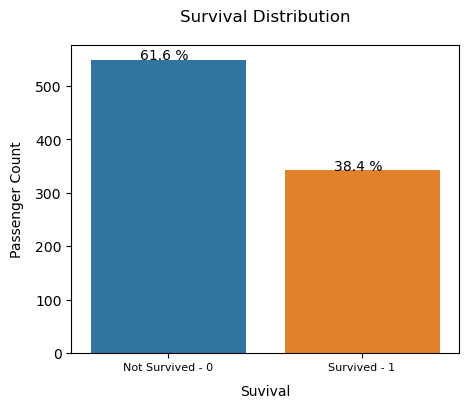

In [24]:
# Visualize the number of survivors in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Survived', data=df)
show_percentage(ax, len(df))

plt.xlabel('Suvival', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Not Survived - 0', 'Survived - 1'], size=8)
plt.title('Survival Distribution', size=12, y=1.05)

# Summarize the data
print(df['Survived'].value_counts())

Out of 891 passengers, only 342 (38.4%) of the total dataset survived. The target variable is not balanced.

#### 1.3.1.2 Pclass feature

3    491
1    216
2    184
Name: Pclass, dtype: int64


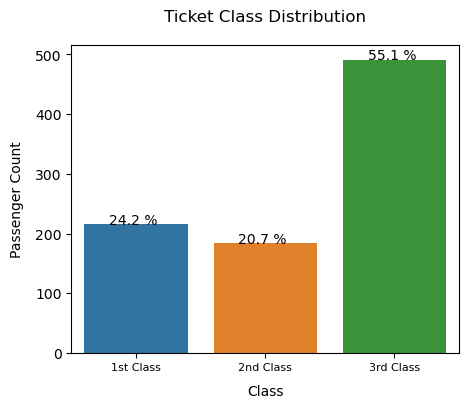

In [25]:
# Visualize the Ticket Class distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Pclass', data=df)
show_percentage(ax, len(df))

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Ticket Class Distribution', size=12, y=1.05)

# Summarize the data
print(df['Pclass'].value_counts())

More than half of the passengers were in third class (55.1%), the rest were distributed 24.2% in first class and 20.7% in second class.

#### 1.3.1.3 SibSP feature - No. of siblings / spouses aboard

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


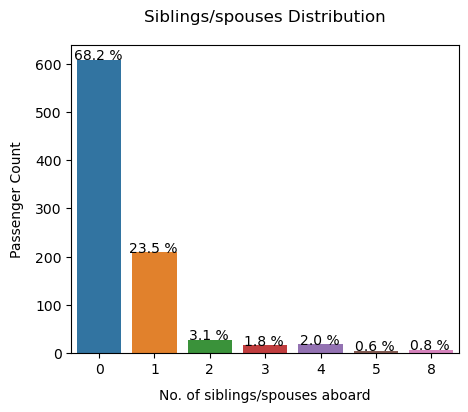

In [26]:
# Visualize the SibSp distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='SibSp', data=df)
show_percentage(ax, len(df))

plt.xlabel('No. of siblings/spouses aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Siblings/spouses Distribution', size=12, y=1.05)

# Summarize the data
print(df['SibSp'].value_counts())

68.2% of passengers were traveling without siblings or spouses, 23.5% were traveling with a brother or spouse, and the remaining 8.3% were traveling with 2 or more siblings/spouses.

#### 1.3.1.4 Parch feature - No. of parents / children aboard 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


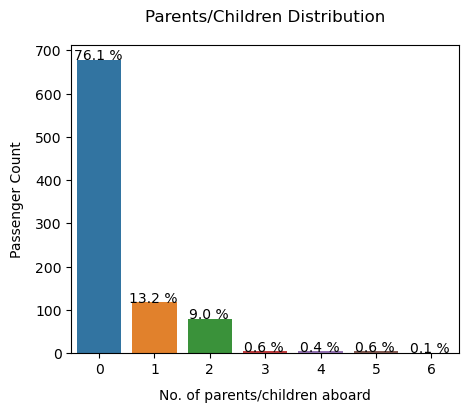

In [27]:
# Visualize the Parch distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Parch', data=df)
show_percentage(ax, len(df))

plt.xlabel('No. of parents/children aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Parents/Children Distribution', size=12, y=1.05)

# Summarize the data
print(df['Parch'].value_counts())

76.1% of passengers were traveling without parents or children, 13.2% were traveling with one relative, and the remaining 10.7% were traveling with 2 or more relatives.


#### 1.3.1.5 Embarked feature 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


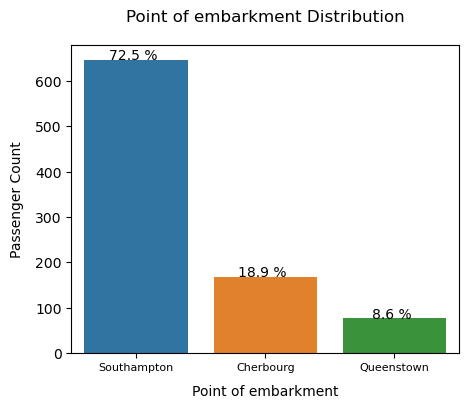

In [28]:
# Visualize the Point of embarkment distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Embarked', data=df)
show_percentage(ax, len(df))

plt.xlabel('Point of embarkment', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['Southampton', 'Cherbourg', 'Queenstown'], size=8)
plt.title('Point of embarkment Distribution', size=12, y=1.05)

# Summarize the data
print(df['Embarked'].value_counts())

The majority of passengers boarded in Southampton (76%), 18% in Cherbourg and just 8.6% in Queenstown

#### 1.3.1.6 Gender   

male      577
female    314
Name: Sex, dtype: int64


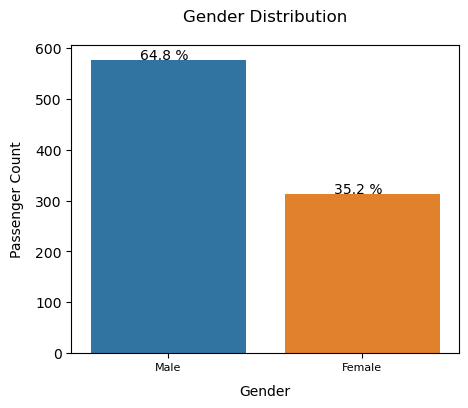

In [29]:
# Visualize the Gender distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Sex', data=df)
show_percentage(ax, len(df))

plt.xlabel('Gender', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Male', 'Female'], size=8)
plt.title('Gender Distribution', size=12, y=1.05)

# Summarize the data
print(df['Sex'].value_counts())

68.4% (577) of the passengers were men and 34% (314) were women.

#### 1.3.1.7 Age Feature   

Text(0.5, 1.05, 'Age Box Plot')

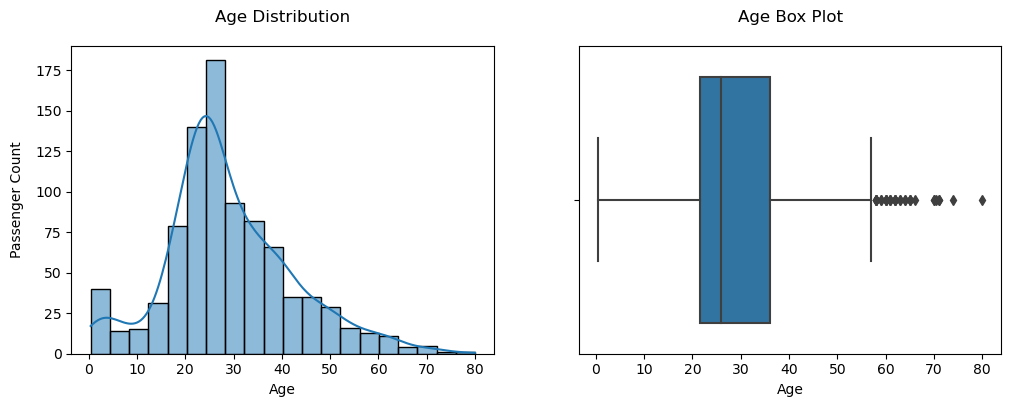

In [30]:
#Visualize Age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Age'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Age'], ax=axes[1])

axes[0].set_title('Age Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Age Box Plot', size=12, y=1.05)

In [31]:
# Summarize the data
print(df['Age'].describe())

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


Most of the passengers were between 20 and 28 years old. This column present outliers.

#### 1.3.1.8 Fare Feature   

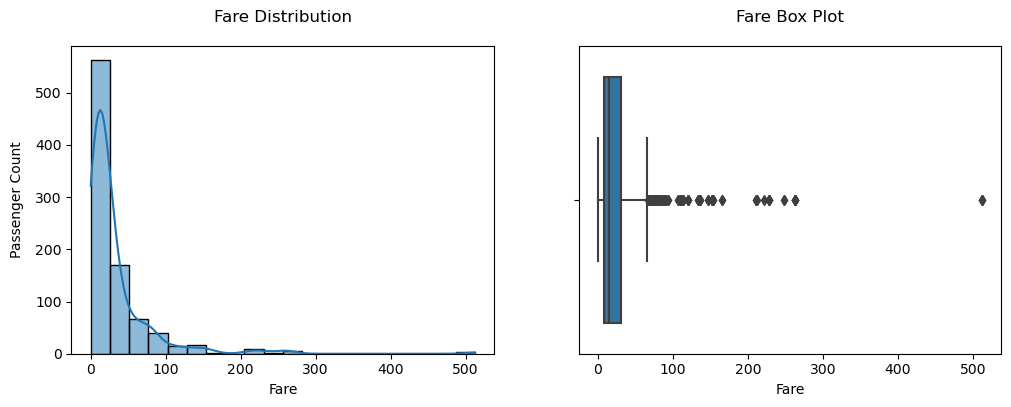

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [164]:
# Visualize Fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Fare'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Fare'], ax=axes[1])

axes[0].set_title('Fare Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Fare Box Plot', size=12, y=1.05)

plt.show()

# Summarize the data
print(df['Fare'].describe())

The data in the column Fare is skewed to the right. Later we will transform the data to obtain a normal distribution that will allow me to improve the predictive model. 
In the boxplot, we can observe there are outliers.

### 1.3.2 Bivariate Analysis

#### 1.3.2.1 Pclass feature

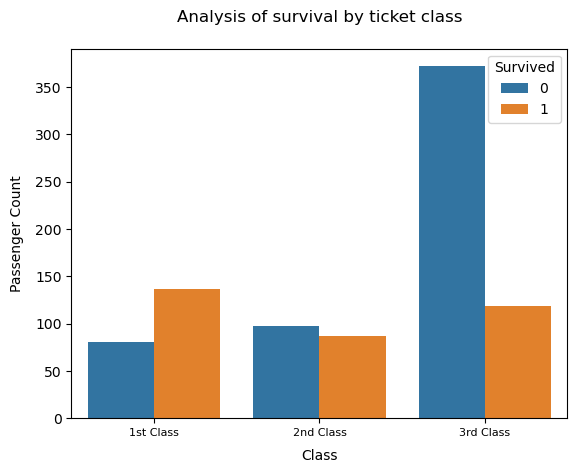

In [33]:
# Comparing Pclass on the basis of Survival
ax = sns.countplot(x = "Pclass", hue = "Survived", data = df)

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Analysis of survival by ticket class', size=12, y=1.05)

plt.show()

- In the above plot, we can see most of the passengers who were traveling in 3rd class did not survive in contrast with the other class passengers.

- In the group of passengers who were traveling in 2nd class, there was an almost equal number of people who died and survived.

- Passengers of 1st class, more survive.

- We can say that a passenger who was traveling in the 3rd has a higher chance of dying. And those who were traveling in 1st class had a higher chance of surviving.

<Figure size 400x400 with 0 Axes>

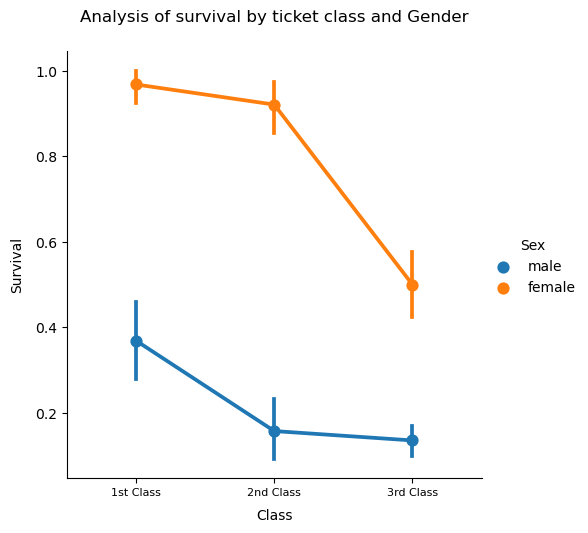

In [34]:
plt.figure(figsize=(4, 4))

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Survival', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Analysis of survival by ticket class and Gender', size=12, y=1.05)

plt.show()

- We can see that women in 1st and 2nd class have a high survival rate of more than 80%. Although the survival rate of 3rd class women is lower, it is still higher than the survival rate of men.
- For men, there are still more survivors in 1st class compared to 2nd and 3rd class

#### 1.3.2.2 SibSp feature

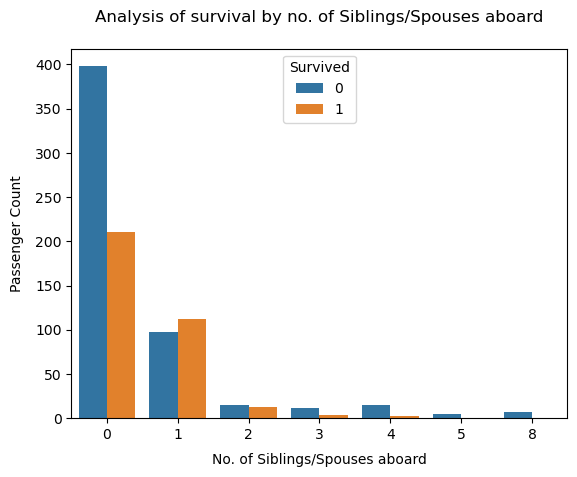

In [35]:
# Comparing SibSp on the basis of Survival
ax = sns.countplot(x = "SibSp", hue = "Survived", data = df)

plt.xlabel('No. of Siblings/Spouses aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Analysis of survival by no. of Siblings/Spouses aboard', size=12, y=1.05)

plt.show()

- Most of the passengers with 0 siblings/spouses did not survive. 
- There were more survivors among the passengers who had 1 companion.
- Passengers with more than two companions are a minority group. Later in the analysis, we will unify this feature with Parch grouping the most significant records

#### 1.3.2.3 Parch feature

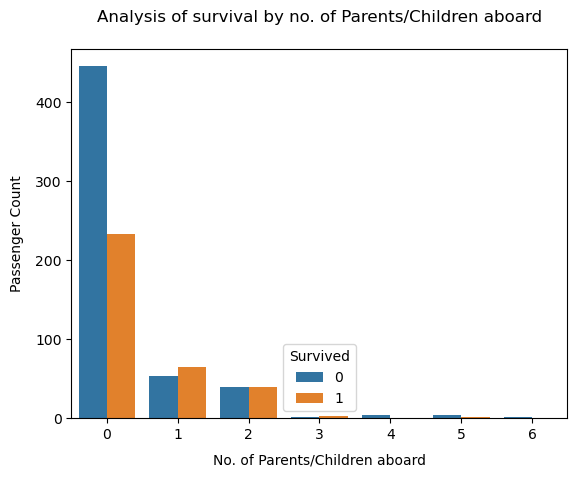

In [36]:
# Comparing SibSp on the basis of Survival
ax = sns.countplot(x = "Parch", hue = "Survived", data = df)

plt.xlabel('No. of Parents/Children aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Analysis of survival by no. of Parents/Children aboard', size=12, y=1.05)

plt.show()

This feature has a similar behavior to SibSp, so later during feature engineering we will group them together.

#### 1.3.2.4 Point of embarkment feature

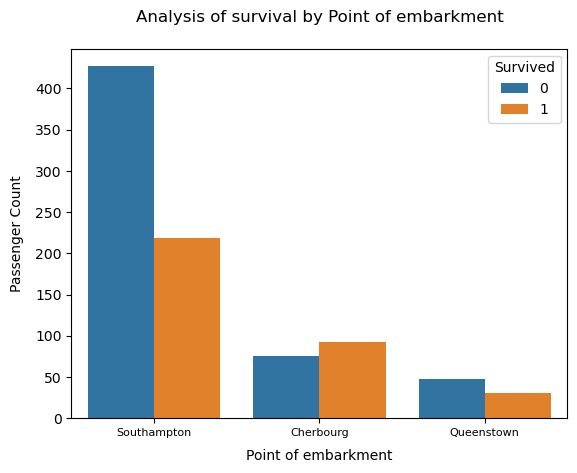

In [37]:
# Comparing Pclass on the basis of Survival
ax = sns.countplot(x = "Embarked", hue = "Survived", data = df)

plt.xlabel('Point of embarkment', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['Southampton', 'Cherbourg', 'Queenstown'], size=8)
plt.title('Analysis of survival by Point of embarkment', size=12, y=1.05)

plt.show()

- We can see that the majority of passengers boarded in Southampton as we saw previously. Furthermore, most of them did not survive.
- Those who embarked in Southampton and Queenstown have a lower survival rate compared to those who embarked in Cherbourg where there is a slight difference with a higher number of survivors.

#### 1.3.2.5 Gender feature

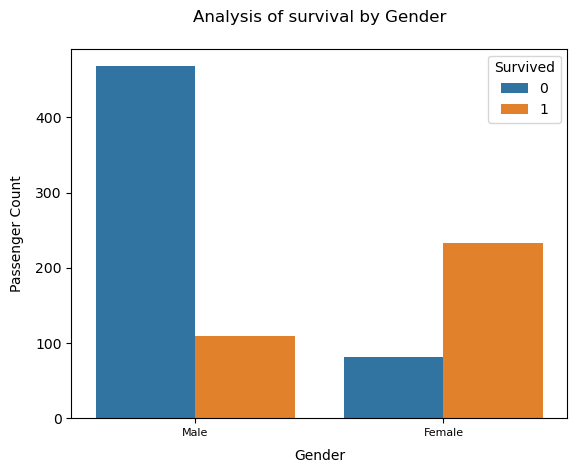

In [38]:
# Comparing Gender on the basis of Survival
ax = sns.countplot(x = "Sex", hue = "Survived", data = df)

plt.xlabel('Gender', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Male', 'Female'], size=8)
plt.title('Analysis of survival by Gender', size=12, y=1.05)

plt.show()

In [39]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- In the graph above, we observe that the majority of male passengers died in contrast to the females who mostly survived. Preference was probably given to women because of the Ladies First policy.  
- 233 female passengers survived out of 314,  and out of 577 males 109 survived.

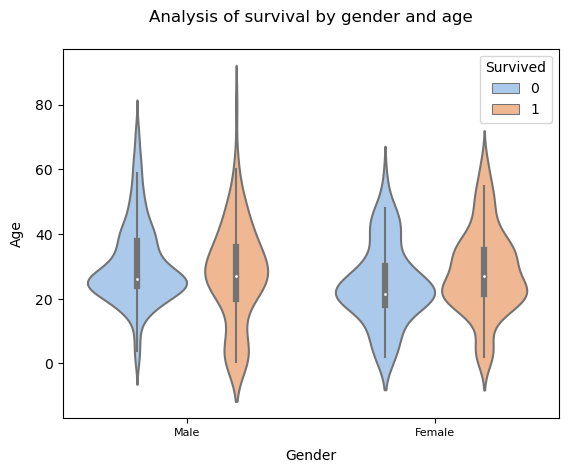

In [40]:
sns.violinplot(x = "Sex", y='Age', data = df, hue = 'Survived', palette = 'pastel')

plt.xlabel('Gender', size=10, labelpad=8)
plt.ylabel('Age', size=10, labelpad=8)
plt.xticks((0, 1), ['Male', 'Female'], size=8)
plt.title('Analysis of survival by gender and age', size=12, y=1.05)

plt.show()

We observe that the outliers are found mainly in the group of male passengers who did not survive.

#### 1.3.2.6 Age feature

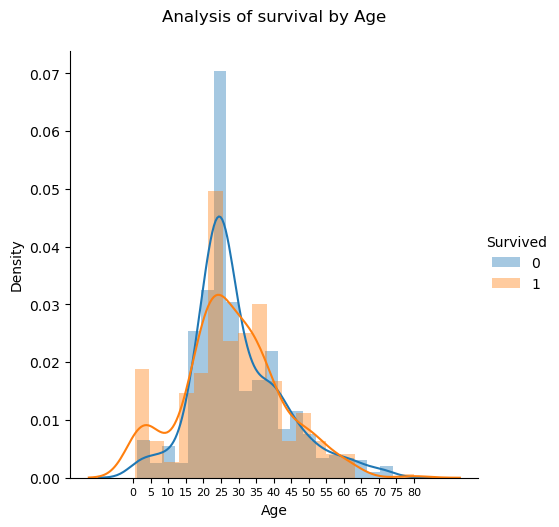

In [41]:
ax = sns.FacetGrid(df, hue="Survived", size=5)
ax.map(sns.distplot, "Age") 
ax.add_legend()

plt.title('Analysis of survival by Age', size=12, y=1.05)
plt.xticks(range(0,85,5),  size=8)

plt.show()

For passengers who are aged less than 20 years (children or teenagers), the number of who survived is greater than the number of people who did not. Probably the priority was given to children or teens.
 
Passengers who were aged between 20 to 45 years. The number of passengers who died is greater than number of passengers who survived.

 For passengers with an age greater than 65 almost all of them died. it could be because of various reasons like people leaving them.
 

In [42]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], df['Age'], aggfunc=['count','mean'], margins=True).style.background_gradient(cmap='Pastel1')

Above we can confirm the number of survivors is greater in 1st class compared to 3rd class. It is interesting to observe the average ages of each group, for example:
- The average age of women who survived in 1st class is 35 years
- The average age of men who survived in 1st class is 37 years
- The average age of men who survived in 2nd class is 18 years

300 male passengers traveling in 3rd class did not survive, the highest number of non-survivors. In contrast, only 3 first-class women did not survive.

#### 1.3.2.7 Fare feature

<Figure size 1200x400 with 0 Axes>

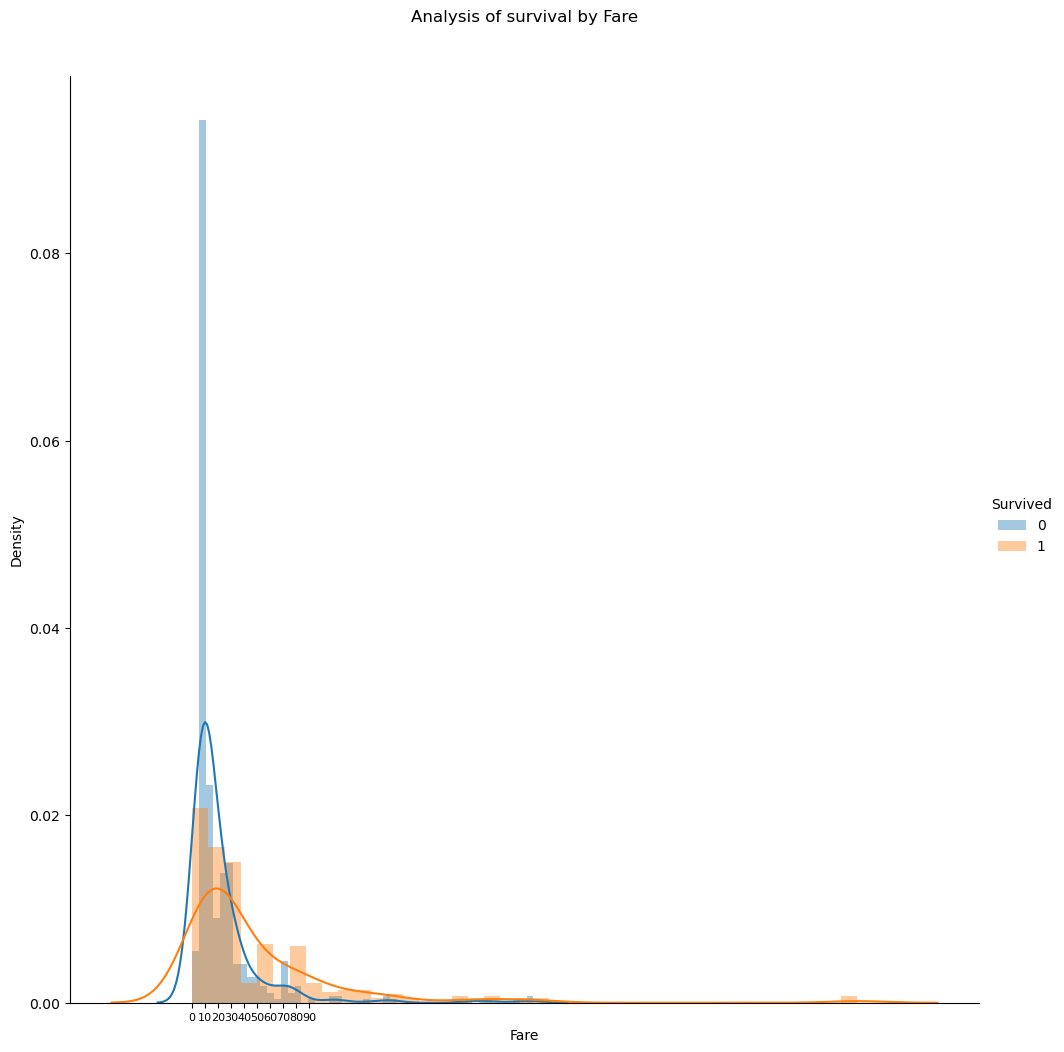

In [43]:
plt.figure(figsize=(12,4))

ax = sns.FacetGrid(df, hue="Survived" , size=10)
ax.map(sns.distplot, "Fare") 
ax.add_legend()

plt.title('Analysis of survival by Fare', size=12, y=1.05)
plt.xticks(range(0,100,10),  size=8)

plt.show()

Passengers who paid low fair have a higher chance of dying. On the other hand, passengers who paid high fair have a higher chance of surviving. This observation is similar as 1st class persons have a higher chance to survive than those who were in 3rd class. The distribution also has positive skew because of the extremely large outliers.

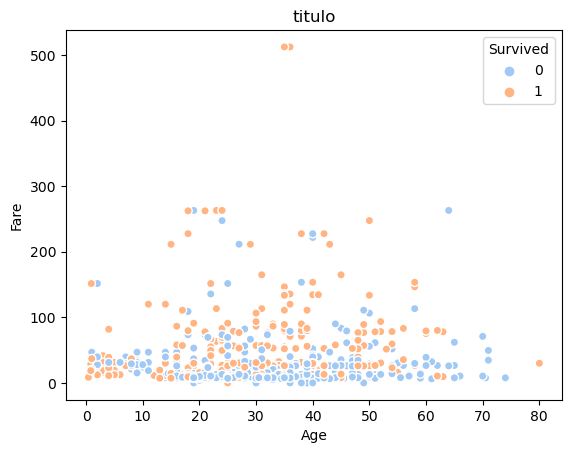

In [44]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, linewidth=1, palette='pastel')
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("titulo")
plt.show()

We observed that those who paid the most for their ticket survived unlike the lowest Fare values. So we can infer that Fare feature is correlated with Pclass feature.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 1.3.3 Multivariate Analysis

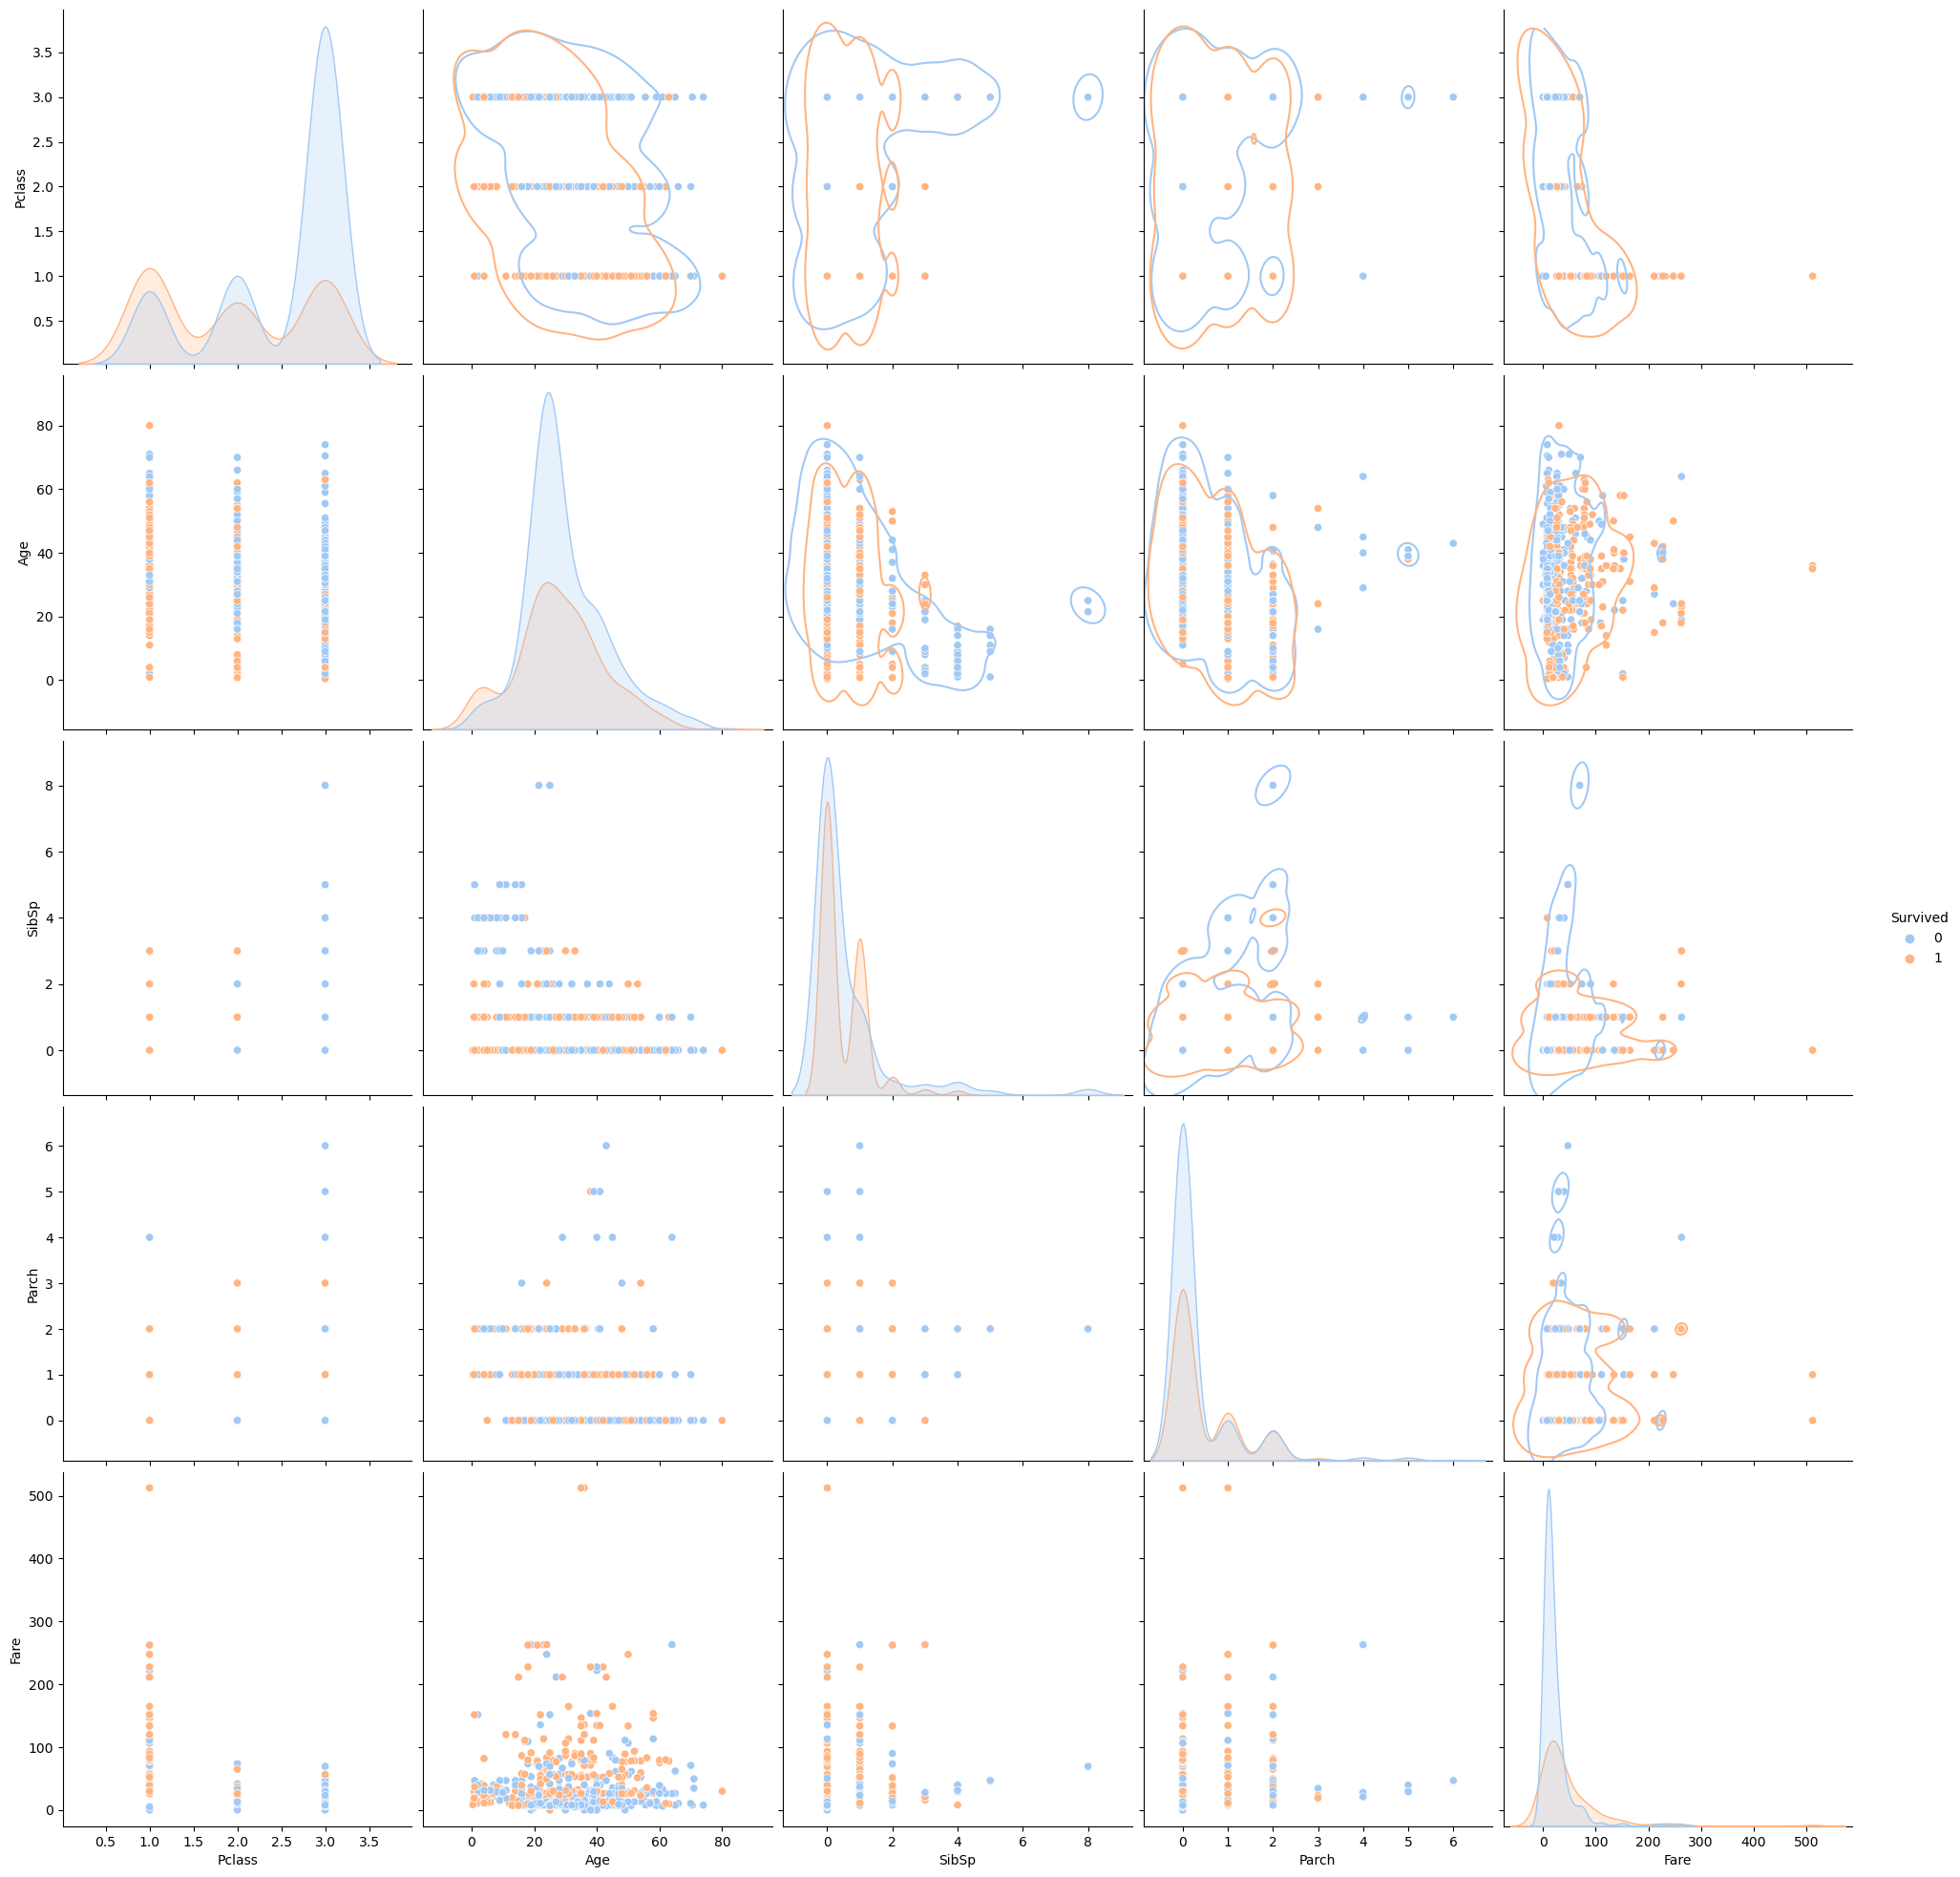

In [45]:
#Understanding the relationship between all the features
g = sns.pairplot(df, hue="Survived", palette='pastel', size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")

plt.show()


- We observed that Pclass is related to the survival rate. It is evident there is a peak of non-survivors in the distribution corresponding to the third class.
- The SibSp and Parch functions have similar behavior.
- The largest number of passengers who did not survive were in the range of 20 to 40 years old.

## 2. Feature Engineering

### 2.1 Missing values
In the Section 1.2.1 the missing values were removed.

In [46]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

### 2.2 SibSp and Parch features -  No. of siblings/ spouces/ parents/ children aboard
We are going to create a new feature from SibSp and Parch called relative. This feature will represent the passenger's companions.

But first, we are going to group the data into three groups: 0 relatives, 1 relative, and 2+ relatives.
The last group will summarize those passengers with more than two relatives, which makes sense because the groups represented by more than two companions are small compared to the groups of 0 and 1 companion. Grouping these columns will give us a better view of the data trends to determine the survival rate.

As we can corroborate in the following graph

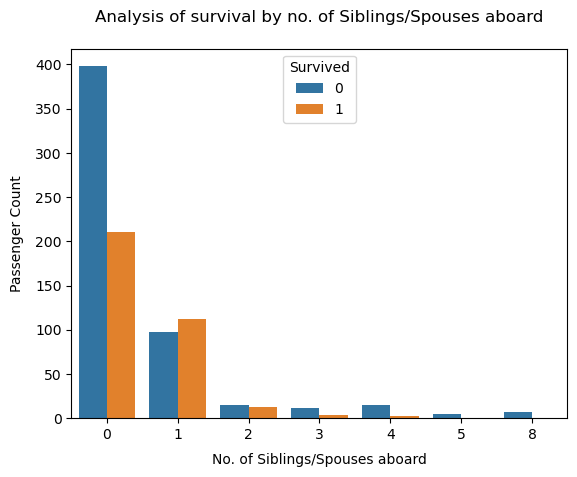

In [47]:
# Comparing SibSp on the basis of Survival
ax = sns.countplot(x = "SibSp", hue = "Survived", data = df)

plt.xlabel('No. of Siblings/Spouses aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Analysis of survival by no. of Siblings/Spouses aboard', size=12, y=1.05)

plt.show()

1. First we are going to create the new groupings for both features separately to verify if this modification does not affect the trend of the survival rate.

In [49]:
# Group SibSp feature in an ordered category.
sibsp_data = [f"{x}" if x < 2 else "2+" for x in df['SibSp']]
df['SibSp_grp'] = pd.Categorical(sibsp_data, categories=["0","1","2+"], ordered=True)

print(">> Summary of SibSp categories:")
print(df['SibSp_grp'].value_counts(),'\n')

# Group Parch feature in an ordered category.
parch_data = [f"{x}" if x < 2 else "2+" for x in df['Parch']]
df['Parch_grp'] = pd.Categorical(parch_data, categories=["0","1","2+"], ordered=True)

print(">> Summary of Parch categories:")
print(df['Parch_grp'].value_counts())


>> Summary of SibSp categories:
0     608
1     209
2+     74
Name: SibSp_grp, dtype: int64 

>> Summary of Parch categories:
0     678
1     118
2+     95
Name: Parch_grp, dtype: int64


2. We are going to plot the new categories for SibSp and Parch features.

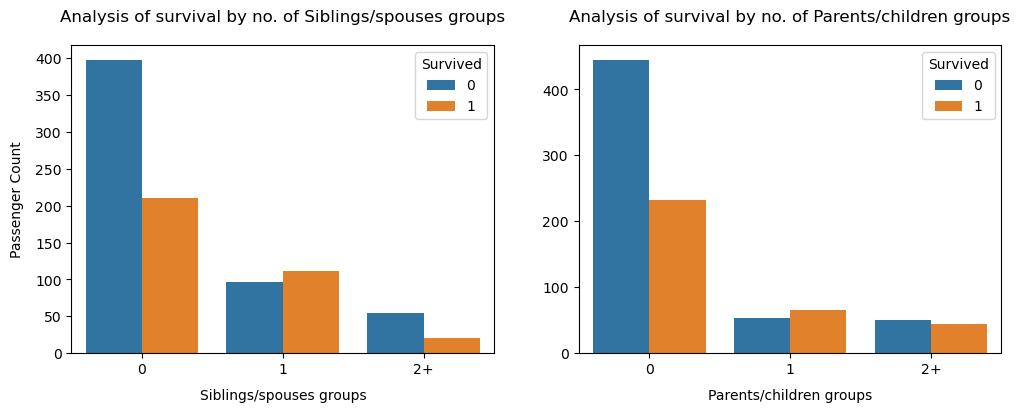

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.countplot(x = "SibSp_grp", hue = "Survived", data = df, ax=axes[0])
ax = sns.countplot(x = "Parch_grp", hue = "Survived", data = df, ax=axes[1])

axes[0].set_title('Analysis of survival by no. of Siblings/spouses groups', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)
axes[0].set_xlabel('Siblings/spouses groups', size=10, labelpad=8)

axes[1].set_title('Analysis of survival by no. of Parents/children groups', size=12, y=1.05)
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].set_xlabel('Parents/children groups', size=10, labelpad=8)

plt.show()

3. We create the new feature that adds SibSp and Parch columns, and then we are going to assemble the groups for the analysis.

In [51]:
# Defines a new feature that shows if the passenger traveled along or with relatives
df['relatives'] = df['SibSp'] + df['Parch']

data = [f"{x}" if x < 2 else "2+" for x in df['relatives']]
df['rel_grp'] = pd.Categorical(data, categories=["0","1","2+"], ordered=True)

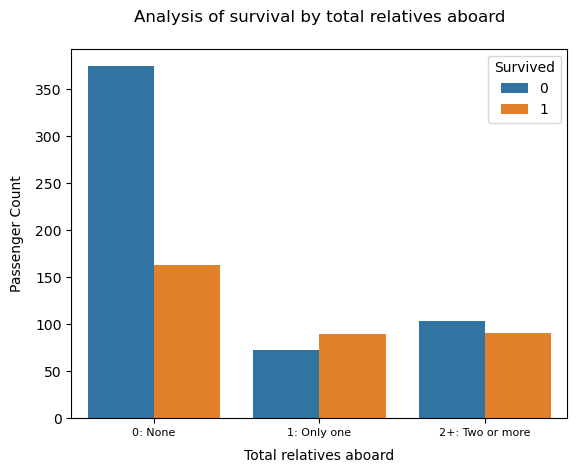

In [52]:
# Comparing relatives on the basis of Survival
sns.countplot(x = "rel_grp", hue = "Survived", data = df)

plt.xlabel('Total relatives aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['0: None', '1: Only one', '2+: Two or more'], size=8)
plt.title('Analysis of survival by total relatives aboard', size=12, y=1.05)

plt.show()

- Passengers without realatives have a ratio of almost 2 to 1, where most of them did not survive.
- Passengers traveling with 1 brother/wife both had an almost equal chance of surviving or not.
- Passengers who have a higher number of relatives (more than two) have a low chance of surviving.

Drop columns that no longer needed: SibSp, Parch, SibSp_grp, Parch_grp, relatives.

In [56]:
# Save a backup of the dataframe
df_all = df.copy()

# Drop the no longer needed columns
df.drop(['SibSp', 'Parch', 'SibSp_grp', 'Parch_grp', 'relatives'], axis = 1, inplace=True)


In [57]:
# Inspect the dataframe
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,rel_grp
0,3,male,22.0,7.2500,S,0,1
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0


### 2.3 Encoding Categorical 
Preprocessing the data to train the regression model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns 'Sex', 'Embarked', and 'rel_grp'.

- For the 'Embarked' column we apply One-Hot encoding considering this column have no specific order and the model is expected to treat each point of embarkment equally.
- For the 'rel_grp' 

In [58]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,rel_grp
0,3,male,22.0,7.2500,S,0,1
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0


In [270]:
# Creating a new dataset 
df_encoded = df.copy()

# One-Hot Encoding - column  'Pclass', 'Sex', 'rel_grp', and 'Embarked'
df_encoded = pd.get_dummies(df_encoded, columns=[ 'Pclass', 'Sex', 'rel_grp', 'Embarked'], prefix=['class', 'Sex', 'rel', 'Embarked'])

In [271]:
# Columns in df_encoded
list(df_encoded)

['Age',
 'Fare',
 'Survived',
 'class_1',
 'class_2',
 'class_3',
 'Sex_female',
 'Sex_male',
 'rel_0',
 'rel_1',
 'rel_2+',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [272]:
# Arranging the columns
df_encoded = df_encoded[['Age',  'Fare', 'class_1', 'class_2', 'class_3', 
                         'Sex_female', 'Sex_male', 
                         'rel_0', 'rel_1', 'rel_2+', 
                         'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived' ]]
# Presenting the dataframe
df_encoded.head()

,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,1,0
1,38.0,71.2833,1,0,0,1,0,0,1,0,1,0,0,1
2,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,1,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,1,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,1,0


### 2.4 Checking for skewness

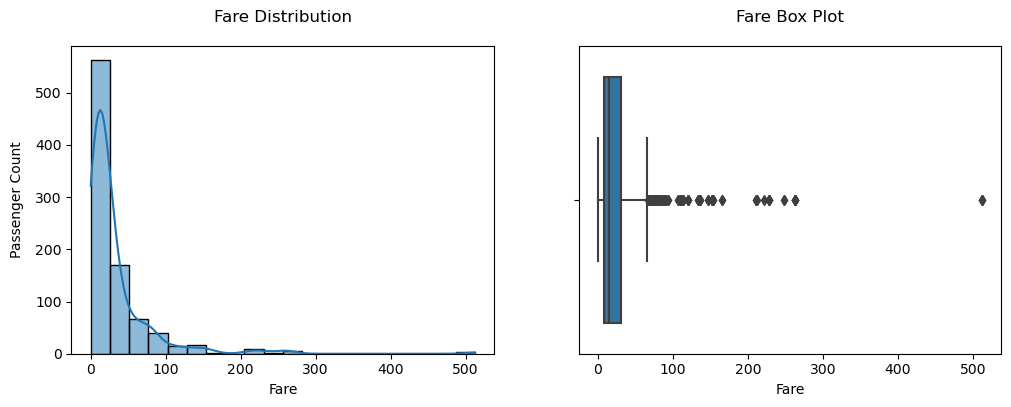

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [273]:
# Visualize Fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_encoded['Fare'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df_encoded['Fare'], ax=axes[1])

axes[0].set_title('Fare Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Fare Box Plot', size=12, y=1.05)

plt.show()

# Summarize the data
print(df['Fare'].describe())

In [274]:
# Cheking the skewness of the data 
df_encoded[['Fare','Age']].skew().sort_values(ascending=False)

Fare    4.787317
Age     0.534083
dtype: float64

Considering that the skewness of Fare (4.787317) is greater than 0.5, we are going to apply methods to remove it.

#### 2.4.1 Removing skewness
Let's try the cube root and log method and then select the best option.

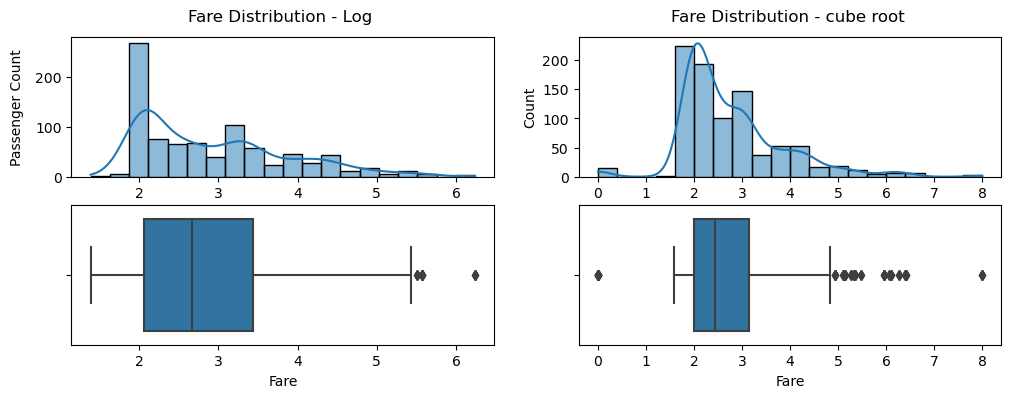

In [275]:
# Visualize Fare distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

sns.histplot(np.log(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,0])
sns.boxplot(np.log(df_encoded['Fare']), ax=axes[1,0])

sns.histplot(np.cbrt(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,1])
sns.boxplot(np.cbrt(df_encoded['Fare']), ax=axes[1,1])

axes[0,0].set_title('Fare Distribution - Log ', size=12, y=1.05)
axes[0,1].set_title('Fare Distribution - cube root ', size=12, y=1.05)

axes[0,0].set_ylabel('Passenger Count', size=10, labelpad=8)

plt.show()

We will select the cube root method because applying logarithms to the zeros in the data set do not produce desired values.

**IMPORTANT**: Handling of zeros: the variable "Fare" contains zeros, to apply log we will apply a small positive constant before taking the logarithm to avoid problems with the logarithm of zero. But in this case, it is a better option using cube-root method.

In [276]:
# Removing skewness using log method
df_process = df_encoded.copy()
df_process['Fare'] = np.cbrt(df_encoded['Fare'])

In [277]:
# Summarize the data
print(df_process['Fare'].describe())

count    891.000000
mean       2.765835
std        1.072486
min        0.000000
25%        1.992505
50%        2.435929
75%        3.141381
max        8.001714
Name: Fare, dtype: float64


In [278]:
# Cheking the skewness of the data 
df_process[['Fare','Age']].skew().sort_values(ascending=False)

Fare    1.230382
Age     0.534083
dtype: float64

### 2.5 Removing the outliers

In [279]:
# Review column Embarked_Q before drop outliers
df_process['Embarked_Q'].value_counts()

0    814
1     77
Name: Embarked_Q, dtype: int64

In [280]:
from scipy.stats import zscore

z = np.abs(zscore(df_process))
z

,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.534891,0.774708,0.565685,0.510152,0.902587,0.737695,0.737695,1.231645,2.129357,0.525837,0.482043,0.307562,0.615838,0.789272
1,0.668392,1.287903,1.767767,0.510152,1.107926,1.355574,1.355574,1.231645,2.129357,0.525837,2.074505,0.307562,1.623803,1.266990
2,0.234070,0.720325,0.565685,0.510152,0.902587,1.355574,1.355574,0.811922,0.469625,0.525837,0.482043,0.307562,0.615838,1.266990
3,0.442776,0.926230,1.767767,0.510152,1.107926,1.355574,1.355574,1.231645,2.129357,0.525837,0.482043,0.307562,0.615838,1.266990
4,0.442776,0.710596,0.565685,0.510152,0.902587,0.737695,0.737695,0.811922,0.469625,0.525837,0.482043,0.307562,0.615838,0.789272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.158865,0.386703,0.565685,1.960202,1.107926,0.737695,0.737695,0.811922,0.469625,0.525837,0.482043,0.307562,0.615838,0.789272
887,0.760507,0.318502,1.767767,0.510152,1.107926,1.355574,1.355574,0.811922,0.469625,0.525837,0.482043,0.307562,0.615838,1.266990
888,0.572494,0.089990,0.565685,0.510152,0.902587,1.355574,1.355574,1.231645,0.469625,1.901731,0.482043,0.307562,0.615838,0.789272
889,0.234070,0.318502,1.767767,0.510152,1.107926,0.737695,0.737695,0.811922,0.469625,0.525837,2.074505,0.307562,1.623803,1.266990


In [281]:
df_new = df_process[(z<3).all(axis=1)]

print(f"{df_process.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_process.shape[0] - df_new.shape[0]) / df_process.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_process.shape[1]} columns.")
df_process = df_new
df_process


99 rows with outliers were deleted.
This represent 11.11% of the data.
In the new dataset there are 792 rows and 14 columns.


,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1.935438,0,0,1,0,1,0,1,0,0,0,1,0
1,38.0,4.146318,1,0,0,1,0,0,1,0,1,0,0,1
2,26.0,1.993730,0,0,1,1,0,1,0,0,0,0,1,1
3,35.0,3.758647,1,0,0,1,0,0,1,0,0,0,1,1
4,35.0,2.004158,0,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,25.0,1.917475,0,0,1,0,1,1,0,0,0,0,1,0
886,27.0,2.351335,0,1,0,0,1,1,0,0,0,0,1,0
887,19.0,3.107233,1,0,0,1,0,1,0,0,0,0,1,1
888,21.5,2.862294,0,0,1,1,0,0,0,1,0,0,1,0


The rows with data in the column Embarked_Q were dropped with outliers.  Therefore, we will drop this column from our analysis.

In [282]:
print(df_process['Embarked_Q'].value_counts())

# Drop column "Embarked_Q"
df_process.drop('Embarked_Q', axis=1, inplace=True)

0    792
Name: Embarked_Q, dtype: int64


### 2.6 Correlation between target variable and independent variables.
#### 2.6.1 Correlation

In [284]:
# Checking the correlation between features and the target.
cor = df_process.corr()
cor

,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_S,Survived
Age,1.000000,0.134350,0.389915,0.016915,-0.350089,-0.071623,0.071623,0.185623,0.075397,-0.290704,0.017850,-0.017850,-0.040335
Fare,0.134350,1.000000,0.653721,-0.072362,-0.502401,0.301982,-0.301982,-0.456134,0.270551,0.286088,0.209063,-0.209063,0.351621
class_1,0.389915,0.653721,1.000000,-0.308895,-0.602147,0.112262,-0.112262,-0.088905,0.216521,-0.098122,0.251847,-0.251847,0.299688
class_2,0.016915,-0.072362,-0.308895,1.000000,-0.573341,0.081837,-0.081837,-0.040408,0.002811,0.045222,-0.138420,0.138420,0.104460
class_3,-0.350089,-0.502401,-0.602147,-0.573341,1.000000,-0.165404,0.165404,0.110507,-0.188880,0.046566,-0.100757,0.100757,-0.345852
Sex_female,-0.071623,0.301982,0.112262,0.081837,-0.165404,1.000000,-1.000000,-0.343380,0.203354,0.215667,0.089743,-0.089743,0.522713
Sex_male,0.071623,-0.301982,-0.112262,-0.081837,0.165404,-1.000000,1.000000,0.343380,-0.203354,-0.215667,-0.089743,0.089743,-0.522713
rel_0,0.185623,-0.456134,-0.088905,-0.040408,0.110507,-0.343380,0.343380,1.000000,-0.577661,-0.641744,-0.089281,0.089281,-0.225907
rel_1,0.075397,0.270551,0.216521,0.002811,-0.188880,0.203354,-0.203354,-0.577661,1.000000,-0.255308,0.147245,-0.147245,0.166531
rel_2+,-0.290704,0.286088,-0.098122,0.045222,0.046566,0.215667,-0.215667,-0.641744,-0.255308,1.000000,-0.032590,0.032590,0.111120


#### 2.6.2 Correlation Matrix

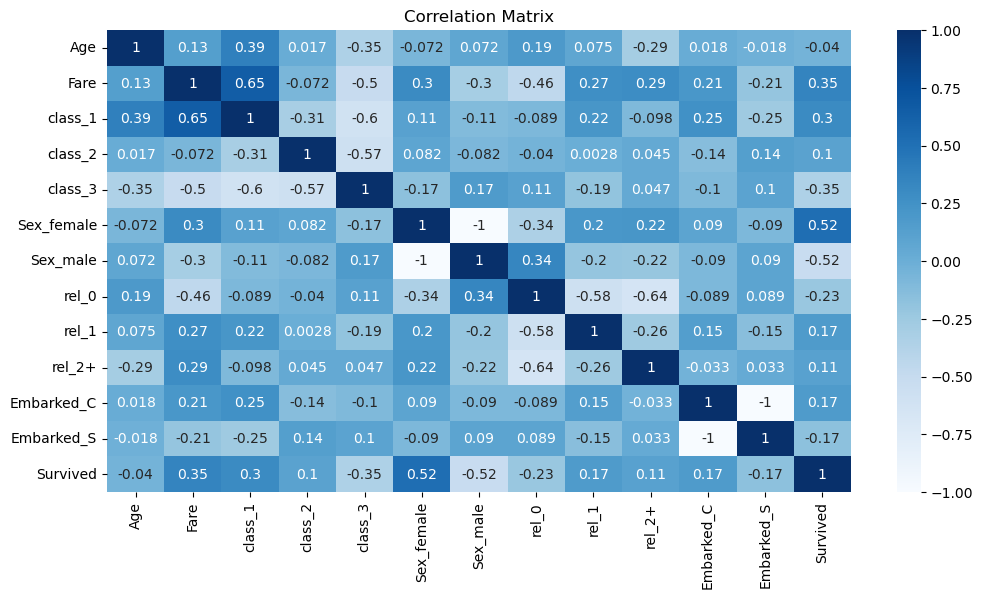

In [288]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Blues', annot=True)
plt.title('Correlation Matrix');

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

- The target "Survived" have a strong positive correlation with Sex_female(0.52), and a lower positive correlation with Fare(0.35), class_1 (0.3), Embarked_C(0.17), and rel_1(0.16).
- The target "Survived" have a strong negative correlation with Sex_male(-0.52), and a lower positive correlation with class_3 (-0.35), rel_1(-0.23), Embarked_S(-0.17), and Age(-0.04).

- There is a high correlation between Fare and class_1 (0.65). 

In [293]:
cor['Survived'].sort_values(ascending = False).to_frame()

,Survived
Survived,1.000000
Sex_female,0.522713
Fare,0.351621
class_1,0.299688
rel_1,0.166531
Embarked_C,0.165905
rel_2+,0.111120
class_2,0.104460
Age,-0.040335
Embarked_S,-0.165905


The target have a strong positive correlation with Sex_female variable.

#### 2.6.3 Visualizing the correlation between label and features using bar plot

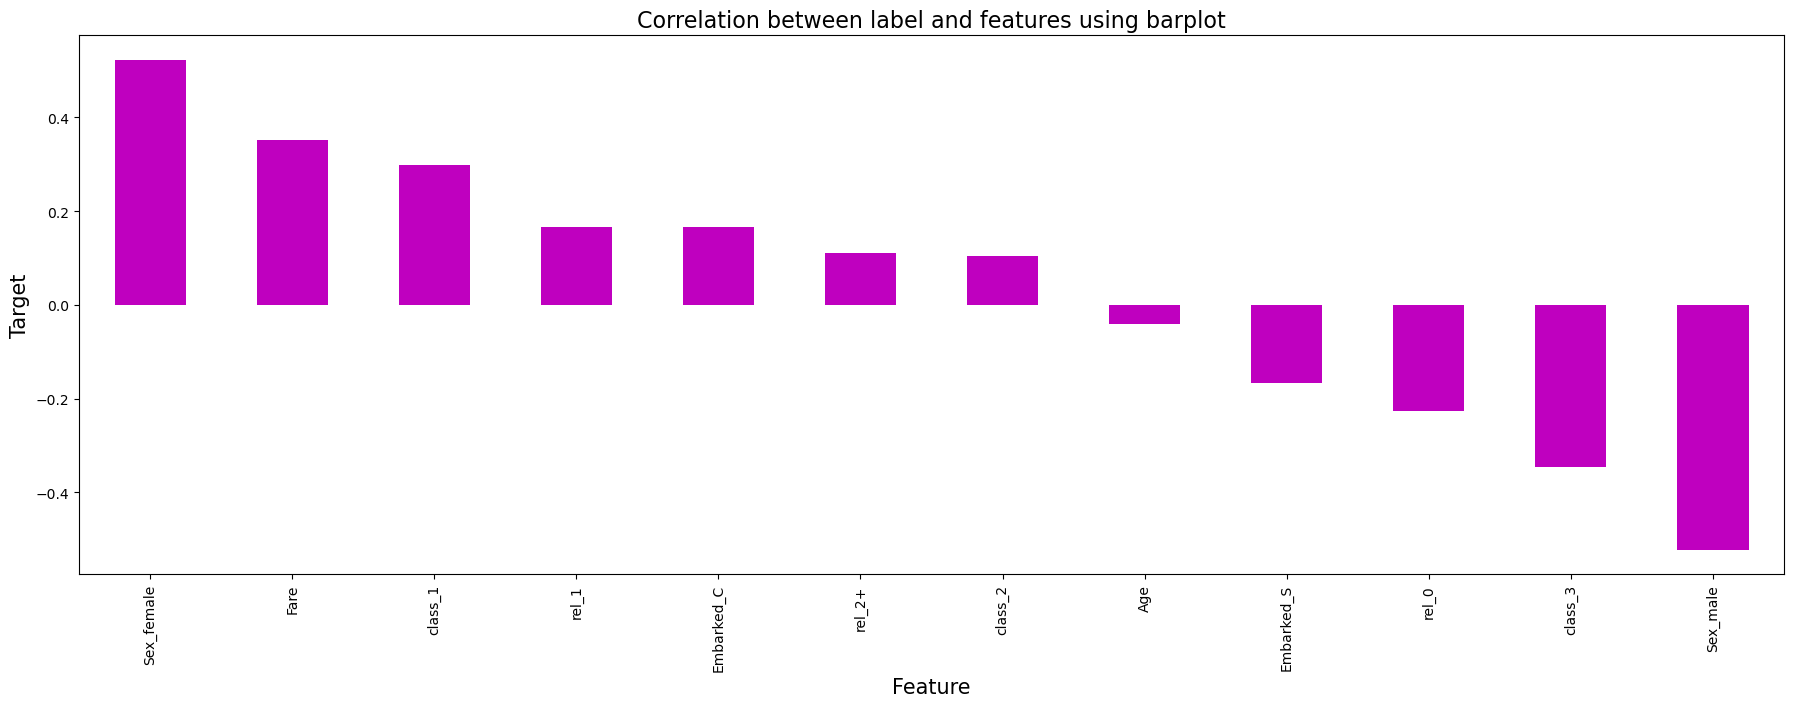

In [298]:
plt.figure(figsize = (22, 7))
cor['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using barplot", fontsize=16)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the feature age have very less correlation.

## 3. Model
### 3.1 Separating features and label

In [290]:
df_process.head()

,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_S,Survived
0,22.0,1.935438,0,0,1,0,1,0,1,0,0,1,0
1,38.0,4.146318,1,0,0,1,0,0,1,0,1,0,1
2,26.0,1.993730,0,0,1,1,0,1,0,0,0,1,1
3,35.0,3.758647,1,0,0,1,0,0,1,0,0,1,1
4,35.0,2.004158,0,0,1,0,1,1,0,0,0,1,0


In [305]:
x = df_process.drop(['Survived'], axis = 1)
y = df_process['Survived']

### 3.2  Feature Scaling using Standard Scalarization

In [306]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Fare,class_1,class_2,class_3,Sex_female,Sex_male,rel_0,rel_1,rel_2+,Embarked_C,Embarked_S
0,-0.545741,-0.832285,-0.569574,-0.542326,0.945905,-0.717175,0.717175,-1.204995,2.085989,-0.532570,-0.493283,0.493283
1,0.685199,1.461374,1.755698,-0.542326,-1.057188,1.394359,-1.394359,-1.204995,2.085989,-0.532570,2.027234,-2.027234
2,-0.238006,-0.771810,-0.569574,-0.542326,0.945905,1.394359,-1.394359,0.829879,-0.479389,-0.532570,-0.493283,0.493283
3,0.454398,1.059188,1.755698,-0.542326,-1.057188,1.394359,-1.394359,-1.204995,2.085989,-0.532570,-0.493283,0.493283
4,0.454398,-0.760992,-0.569574,-0.542326,0.945905,-0.717175,0.717175,0.829879,-0.479389,-0.532570,-0.493283,0.493283
...,...,...,...,...,...,...,...,...,...,...,...,...
787,-0.314940,-0.850921,-0.569574,-0.542326,0.945905,-0.717175,0.717175,0.829879,-0.479389,-0.532570,-0.493283,0.493283
788,-0.161072,-0.400817,-0.569574,1.843909,-1.057188,-0.717175,0.717175,0.829879,-0.479389,-0.532570,-0.493283,0.493283
789,-0.776543,0.383383,1.755698,-0.542326,-1.057188,1.394359,-1.394359,0.829879,-0.479389,-0.532570,-0.493283,0.493283
790,-0.584208,0.129274,-0.569574,-0.542326,0.945905,1.394359,-1.394359,-1.204995,-0.479389,1.877689,-0.493283,0.493283


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

### 3.3  Checking Variance Inflation Factor (VIF)

In [307]:
# Finding variance inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,class_1,inf
3,class_2,inf
4,class_3,inf
5,Sex_female,inf
6,Sex_male,inf
7,rel_0,inf
8,rel_1,inf
9,rel_2+,inf
10,Embarked_C,inf
11,Embarked_S,inf


As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). 
Infinite values correspond to categorical features. We can continue with model building. 

## 3.4 Checking for imbalance

Distribution of target variable: Survived
0    0.621212
1    0.378788
Name: Survived, dtype: float64


<AxesSubplot:>

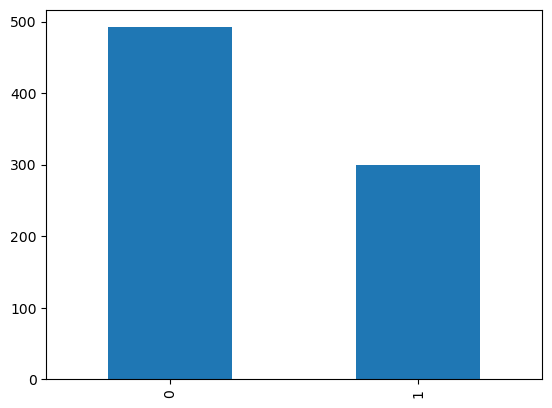

In [315]:
print("Distribution of target variable: Survived")
print(y.value_counts(normalize=True))
y.value_counts().plot(kind='bar')

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

### 3.4.1 Oversampling

In [317]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

Distribution of target variable: Survived (After oversampling)
0    0.5
1    0.5
Name: Survived, dtype: float64


<AxesSubplot:>

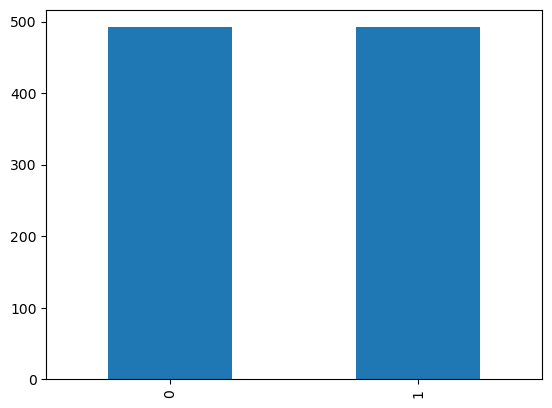

In [318]:
print("Distribution of target variable: Survived (After oversampling)")
print(y1.value_counts(normalize=True))
y1.value_counts().plot(kind='bar')

## 3.5   Finding the best random state

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, x1, y1) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.8682 at random_state 106


Best accuracy is 0.8682 at random_state 106

## 3.6 Creating train test split


In [321]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (688, 12)
x_test shape:   (296, 12)
y_train shape:  (688,)
y_test shape:   (296,)


## 3.7 Classification Algorithms

In [325]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [351]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [358]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}
    

### 3.7.1 RandomForestClassifier

In [359]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[131  22]
 [ 19 124]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       153
           1       0.85      0.87      0.86       143

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296

Training Accuracy using RandomForestClassifier is 98.69%
The accuracy score using RandomForestClassifier is 86.15%


### 3.7.2 ExtraTreesClassifier

In [360]:
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[125  28]
 [ 21 122]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       153
           1       0.81      0.85      0.83       143

    accuracy                           0.83       296
   macro avg       0.83      0.84      0.83       296
weighted avg       0.84      0.83      0.83       296

Training Accuracy using ExtraTreesClassifier is 98.69%
The accuracy score using ExtraTreesClassifier is 83.45%


### 3.7.3 LogisticRegression

In [361]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[121  32]
 [ 23 120]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       153
           1       0.79      0.84      0.81       143

    accuracy                           0.81       296
   macro avg       0.81      0.82      0.81       296
weighted avg       0.82      0.81      0.81       296

Training Accuracy using LogisticRegression is 78.05%
The accuracy score using LogisticRegression is 81.42%


### 3.7.4 SVC

In [362]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[122  31]
 [ 28 115]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       153
           1       0.79      0.80      0.80       143

    accuracy                           0.80       296
   macro avg       0.80      0.80      0.80       296
weighted avg       0.80      0.80      0.80       296

Training Accuracy using SVC is 81.54%
The accuracy score using SVC is 80.07%


### 3.7.5 GradientBoostingClassifier

In [363]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[127  26]
 [ 26 117]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       153
           1       0.82      0.82      0.82       143

    accuracy                           0.82       296
   macro avg       0.82      0.82      0.82       296
weighted avg       0.82      0.82      0.82       296

Training Accuracy using GradientBoostingClassifier is 89.39%
The accuracy score using GradientBoostingClassifier is 82.43%


### 3.7.6 AdaBoostClassifier

In [364]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[119  34]
 [ 21 122]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       153
           1       0.78      0.85      0.82       143

    accuracy                           0.81       296
   macro avg       0.82      0.82      0.81       296
weighted avg       0.82      0.81      0.81       296

Training Accuracy using AdaBoostClassifier is 82.41%
The accuracy score using AdaBoostClassifier is 81.42%


### 3.7.7 BaggingClassifier

In [365]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[128  25]
 [ 20 123]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       153
           1       0.83      0.86      0.85       143

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296

Training Accuracy using BaggingClassifier is 97.24%
The accuracy score using BaggingClassifier is 84.8%


## 3.8 Comparing Models

In [373]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",0.986919,0.861486
6,BaggingClassifier,(DecisionTreeClassifier(random_state=935293564...,0.972384,0.847973
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=753735359), ...",0.986919,0.834459
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.893895,0.824324
2,LogisticRegression,LogisticRegression(),0.780523,0.814189
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.824128,0.814189
3,SVC,SVC(),0.815407,0.800676


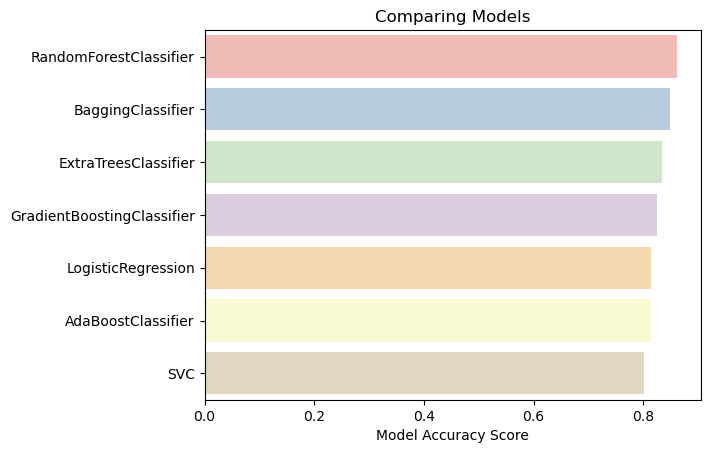

In [378]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='Pastel1')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The model with best accuracy is RandomForestClassifier with 86.14% of accuracy.

## 3.9 Hyper Parameter Tuning
### 3.9.1 Finding the best parameters

In [379]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
param_grid = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


# Build the el modelo RandomForestClassifier
model = RandomForestClassifier()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [380]:
# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [384]:
print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

These are the best parameters for training the model.

In [382]:
best_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=80,
                       max_features=3, min_samples_leaf=3,
                       min_samples_split=12)

### 3.9.1 Final Model

In [387]:
print(f"Best random state: {random_state}")

Best random state: 106


In [386]:
best_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=80,
                                    max_features=3, min_samples_leaf=3,
                                    min_samples_split=12, n_jobs=-1, n_estimators=100, random_state=random_state)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 85.47%


### 3.9.2 Plotting ROC and compare AUC for all  the models used

In [388]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

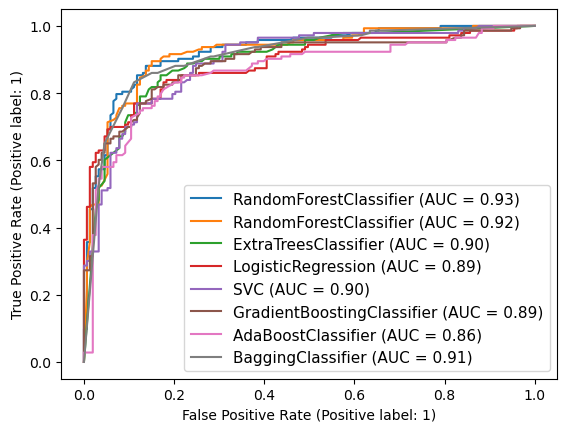

In [390]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

# First Plot ROC Curve from Best Model
plot_roc_curve(best_model, x_test, y_test, ax=ax)

# Plot each ROC Curve from each model 
for id_model, model in models.items(): 
    plot_roc_curve(model, x_test, y_test, ax=ax)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see area under curve for each model used. The blue one is the best model.

### 3.9.3  Plotting ROC and compare AUC for  the best model 

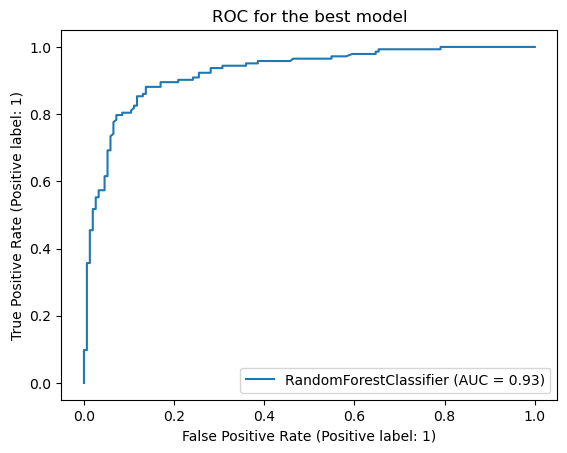

In [391]:
# Let's check the AUC for the best model after hyer parameter tuning
plot_roc_curve(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

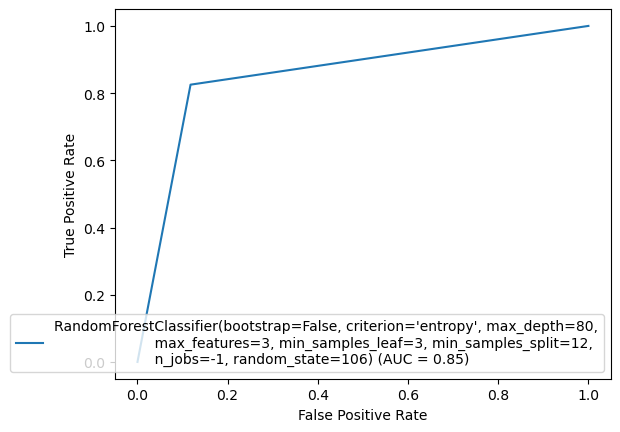

In [393]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = best_model)
display.plot()

Here we have plotted the ROC curve for the best model and the AUC value for the best model is 85%

## 3.10 Saving the model

In [395]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Titanic_survived_model.pkl")

['Titanic_survived_model.pkl']

## 3.11 Predicting the saved model

In [396]:
# Lets load the saved model and get the predictions
model = joblib.load("Titanic_survived_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {round(accuracy_score(y_test, prediction),4)}")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 0.8547


,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
Predicted,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
Original,0,1,0,0,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0


These are the predicted values in a dataset to compared the prediction with the test data.

**Final Conclusions:**
- The given dataset consists of 12 features, however, we are doing uni-variate analysis only on 8 features because the rest 4 features are useless or do not give much information for prediction. This is the case of PassengerId, Passenger name, and Ticket, columns that it's better to drop. And the fourth column to drop is Cabin because it has a 77.10% of missing values.
- In the final dataset we have two numerical continuous features (Age and Fare) and the other were categorical (Pclass, Sex, relatives (SibSp + Parch), Embarked.
- The best model was RandomForestClassifier with accuracy_score: 85.47%
- Eliminating the outliers represented the elimination of 11.11% of the total records (99 rows).

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga